In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [58]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

In [59]:
labels = ['angry', 'disgust','fear','happy','neutral','sad','surprise']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img),0)[...,::-1] #convert BGR to RGB format
                #resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([img_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
def get_data(data_dir):
    data = [] 
   
    path = data_dir

    for img in os.listdir(path):
        try:
            img_arr = cv2.imread(os.path.join(path, img),0)[...,::-1] #convert BGR to RGB format
            #resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
            data.append(img_arr)
        except Exception as e:
            print(e)
    return np.array(data)

In [60]:
train=get_data('./dataset/train');

In [61]:
test=get_data('./dataset/test');

In [65]:
x_train=[]
y_train=[]
for img,label in train:
    x_train.append(img)
    y_train.append(label)


In [63]:
# xtrain=[]
# for i in train_X:
#     i.reshape((150,150,1))
#     xtrain.append(i)


NameError: name 'train_X' is not defined

In [66]:
x_train

[array([[ 86, 151, 133, ...,  15,  32,  50],
        [ 89, 151, 138, ...,  22,  34,  57],
        [ 89, 149, 142, ...,  24,  30,  61],
        ...,
        [ 85, 104, 149, ..., 100, 100, 103],
        [ 86, 120, 151, ..., 113, 111, 107],
        [ 83, 136, 143, ..., 112, 104, 104]], dtype=uint8),
 array([[ 17,  12,  11, ...,  29,  24,  29],
        [ 23,  20,  15, ...,  14,  14,  17],
        [ 23,  35,  33, ...,   3,   4,   0],
        ...,
        [ 43,  47,  44, ..., 247, 248, 250],
        [ 55,  58,  41, ..., 248, 248, 247],
        [ 24,  24,  15, ..., 244, 248, 249]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[138, 114,  96, ...,  98, 138, 155],
        [135, 112,  91, ...,  94, 103, 121],
        [134, 113,  89, ...,  74,  87,  91],
        ...,
        [127, 131, 129, ...,  

In [29]:
x_test=[]
y_test=[]

for img,label in test:
    x_test.append(img)
    y_test.append(label)



In [67]:
#normalize all images

x_train=np.array(x_train)/255
x_test=np.array(x_test)/255

In [69]:
x_train.shape

(28709, 48, 48)

In [9]:
x_train=x_train.reshape(x_train.shape[0],48,48,1);
x_test=x_test.reshape(x_test.shape[0],48,48,1);

In [10]:
x_test=np.array(x_test)
y_test=np.array(y_test)
x_train=np.array(x_train)
y_train=np.array(y_train)

In [11]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)


In [12]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [18]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.layers import Input
from keras.optimizers import Adam

from tensorflow.keras.layers import Dense, Conv2D , MaxPooling2D , Flatten , Dropout 
from tensorflow.keras.layers import Activation , BatchNormalization

In [28]:
from tensorflow.keras.models import Sequential
row=x_train.shape[1]
col=x_train.shape[2]

#Little VGG model

model=Sequential()
model.add(Conv2D(64,(3,3),padding='same',input_shape=(row,col,1)))
model.add(Activation('relu'));
model.add(BatchNormalization());


model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),padding='same',input_shape=(row,col,1)))
model.add(Activation('relu'));
model.add(BatchNormalization());


model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256,(3,3),padding='same',input_shape=(row,col,1)))
model.add(Activation('relu'));
model.add(BatchNormalization());


model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'));
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(256))
model.add(Activation('relu'));
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(7))
model.add(Activation('softmax'))

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
activation_20 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
activation_21 (Activation)   (None, 24, 24, 128)      

In [135]:
from tensorflow.keras.layers import Layer
row=x_train.shape[1]
col=x_train.shape[2]
# creating inception like model..

input_shape=layers.Input((row,col,1))

#stage-1
div1=layers.Conv2D(128,(1,1),padding='same',activation='relu')(input_shape)

div2=layers.Conv2D(256,(3,3),padding='same',activation='relu')(input_shape)
div2=layers.Conv2D(256,(1,1),padding='same',activation='relu')(div2)

div3=layers.Conv2D(512,(5,5),padding='same',activation='relu')(input_shape)
div3=layers.Conv2D(256,(1,1),padding='same',activation='relu')(div3)

div4=layers.Conv2D(256,(1,1),padding='same',activation='relu')(input_shape)
div4=layers.MaxPooling2D((3,3),strides=(1,1),padding='same')(div4)

merge=layers.concatenate([div1,div2,div3,div4])


#stage-2

newdiv1=layers.Conv2D(32,(1,1),padding='same',activation='relu')(merge)

newdiv2=layers.Conv2D(64,(3,3),padding='same',activation='relu')(merge)
newdiv2=layers.Conv2D(64,(1,1),padding='same',activation='relu')(newdiv2)

newdiv3=layers.Conv2D(128,(5,5),padding='same',activation='relu')(merge)
newdiv3=layers.Conv2D(64,(1,1),padding='same',activation='relu')(newdiv3)

newdiv4=layers.Conv2D(256,(1,1),padding='same',activation='relu')(merge)
newdiv4=layers.MaxPooling2D((3,3),strides=(1,1),padding='same')(newdiv4)

merge2=layers.concatenate([newdiv1,newdiv2,newdiv3,newdiv4])
merge2=layers.MaxPooling2D((3,3),strides=(2,2),padding='same')(merge2)

#dense layer
merge2=layers.Flatten()(merge2)

hidden=layers.Dense(8, activation='relu')(merge2)
hidden=layers.Dropout(0.4)(hidden)
hidden=layers.Dense(512, activation='relu')(hidden)
hidden=layers.Dropout(0.25)(hidden)
output=layers.Dense(7, activation='softmax')(hidden)

model=Model(input_shape,output)



In [26]:
ipt=layers.Input((row,col,1))

l1=layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1))(ipt)
l2=layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(l1)
l3=layers.MaxPooling2D(pool_size=(2, 2))(l2)
l4=layers.Dropout(0.25)(l3)

l5=layers.Conv2D(128, kernel_size=(3, 3), activation='relu')(l4)
l6=layers.MaxPooling2D(pool_size=(2, 2))(l5)
l7=layers.Conv2D(128, kernel_size=(3, 3), activation='relu')(l6)
l8=layers.MaxPooling2D(pool_size=(2, 2))(l7)
l9=layers.Dropout(0.25)(l8)

f1=layers.Flatten()(l9)
f2=layers.Dense(1024, activation='relu')(f1)
f3=layers.Dropout(0.5)(f2)
out=layers.Dense(7, activation='softmax')(f3)


seq_model=Model(ipt,out)

In [101]:

#tf.keras.utils.plot_model(model,to_file='./model_figure.png',show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [27]:
seq_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 10, 10, 128)      

In [33]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])


In [36]:
history=model.fit(x_train,y_train,batch_size=32,epochs=10,verbose=1)

Epoch 1/10
898/898 [==============================] - 405s 451ms/step - loss: 1.8255 - accuracy: 0.2999
Epoch 2/10
898/898 [==============================] - 408s 454ms/step - loss: 1.6265 - accuracy: 0.3760
Epoch 3/10
898/898 [==============================] - 405s 451ms/step - loss: 1.5178 - accuracy: 0.4182
Epoch 4/10
898/898 [==============================] - 404s 450ms/step - loss: 1.4298 - accuracy: 0.4522
Epoch 5/10
898/898 [==============================] - 405s 451ms/step - loss: 1.3639 - accuracy: 0.4777
Epoch 6/10
898/898 [==============================] - 440s 490ms/step - loss: 1.3072 - accuracy: 0.5017
Epoch 7/10
898/898 [==============================] - 361s 402ms/step - loss: 1.2621 - accuracy: 0.5224
Epoch 8/10
898/898 [==============================] - 341s 380ms/step - loss: 1.2255 - accuracy: 0.5381
Epoch 9/10
898/898 [==============================] - 354s 394ms/step - loss: 1.1869 - accuracy: 0.5524
Epoch 10/10
898/898 [==============================] - 353s 393m

In [34]:
seq_model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [35]:
history=seq_model.fit(x_train,y_train,batch_size=16,epochs=10,verbose=1)

Epoch 1/10
1795/1795 [==============================] - 247s 138ms/step - loss: 1.8005 - accuracy: 0.2560
Epoch 2/10
 141/1795 [=>............................] - ETA: 3:41 - loss: 1.7807 - accuracy: 0.2598

KeyboardInterrupt: 

In [38]:
model.save('1stModelAcc_56.h5')

In [86]:
img1=x_test[6009]
img1=np.reshape(img1,(1,48,48,1))
pr=model.predict(img1)
pr

array([[0.18688288, 0.02927248, 0.20211162, 0.03995725, 0.2833689 ,
        0.22706747, 0.03133931]], dtype=float32)

array([0., 0., 0., 0., 0., 1., 0.], dtype=float32)

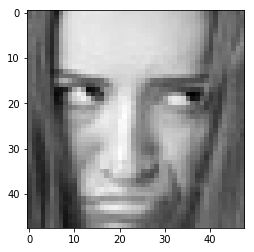

In [87]:

img2=np.reshape(img1,(48,48))
plt.imshow(img2,cmap='gray')
y_test[6009]


In [88]:
pred=model.predict(x_test)

In [96]:
pred

array([[5.5869896e-02, 2.8498201e-03, 1.1528675e-02, ..., 6.1507016e-02,
        4.5151703e-02, 1.9787097e-02],
       [1.3935903e-01, 6.1919838e-03, 3.1401399e-01, ..., 7.3548004e-02,
        4.2190987e-01, 2.4569180e-02],
       [1.5552074e-01, 6.4060278e-03, 1.2863387e-01, ..., 9.4460919e-02,
        5.2299064e-01, 2.4101591e-02],
       ...,
       [4.0248297e-03, 2.4050676e-04, 8.8389702e-03, ..., 2.6601790e-02,
        9.0574002e-04, 9.0222913e-01],
       [8.5421048e-02, 7.0708874e-03, 6.8057388e-02, ..., 5.0686817e-03,
        7.5917020e-03, 8.1603777e-01],
       [5.0264911e-04, 1.5751980e-04, 2.1937586e-02, ..., 8.7846676e-04,
        2.6334985e-04, 9.6913898e-01]], dtype=float32)

In [97]:
cost=[];
for i in range(0,len(pred) ):
    cost.append(np.argmax(pred[i]))


[3,
 5,
 5,
 0,
 0,
 2,
 0,
 0,
 4,
 0,
 1,
 4,
 5,
 5,
 4,
 0,
 0,
 4,
 5,
 4,
 3,
 4,
 0,
 0,
 0,
 5,
 0,
 4,
 0,
 2,
 3,
 0,
 5,
 5,
 4,
 4,
 4,
 3,
 2,
 0,
 5,
 4,
 0,
 6,
 2,
 0,
 0,
 5,
 3,
 2,
 5,
 0,
 6,
 0,
 0,
 0,
 3,
 4,
 5,
 5,
 5,
 0,
 2,
 4,
 6,
 0,
 0,
 5,
 4,
 2,
 0,
 0,
 5,
 5,
 3,
 1,
 0,
 3,
 5,
 0,
 2,
 0,
 4,
 3,
 3,
 4,
 3,
 0,
 3,
 4,
 0,
 4,
 5,
 5,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 5,
 5,
 0,
 0,
 0,
 0,
 3,
 3,
 5,
 0,
 4,
 0,
 0,
 0,
 5,
 3,
 0,
 0,
 0,
 5,
 5,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 3,
 0,
 6,
 5,
 3,
 5,
 0,
 4,
 0,
 0,
 5,
 5,
 6,
 4,
 6,
 5,
 3,
 5,
 5,
 2,
 0,
 5,
 5,
 0,
 0,
 0,
 3,
 3,
 3,
 2,
 4,
 5,
 0,
 0,
 3,
 0,
 4,
 0,
 0,
 5,
 5,
 5,
 0,
 0,
 0,
 3,
 3,
 6,
 0,
 0,
 5,
 0,
 5,
 4,
 0,
 5,
 5,
 4,
 5,
 3,
 2,
 5,
 2,
 2,
 4,
 2,
 4,
 5,
 5,
 5,
 4,
 0,
 4,
 4,
 4,
 0,
 0,
 4,
 6,
 4,
 2,
 4,
 3,
 0,
 0,
 0,
 5,
 0,
 0,
 4,
 0,
 5,
 0,
 2,
 2,
 3,
 4,
 4,
 0,
 1,
 4,
 5,
 5,
 3,
 2,
 4,
 3,
 4,
 3,
 6,
 4,
 3,
 6,
 5,
 4,
 6,
 3,
 4,


In [104]:
cost[1003]

1

In [105]:
y_test[1000]

array([0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [108]:
cv2.imshow('img',img2)